In [22]:
# 1) Créer un ensemble d'entraînement (Train set) et un ensemble de test (Test set). Entraîner le modèle puis l'évaluer.
# 2) Avec GridSearch, trouver les meilleurs hyperparamètres : n_neighbors, metric et weights.
# 3) Est-ce que collecter plus de données serait utile ?

In [19]:
#Importe tous les frameworks nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
#importe learning curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt


In [11]:
titanic = sns.load_dataset("titanic")
titanic = titanic[["survived", "age", "pclass", "sex"]]
titanic.dropna(axis=0, inplace=True)
titanic["sex"].replace(["male", "female"], [1, 0], inplace=True)
titanic.head()

C:\Users\32472\AppData\Local\Temp\ipykernel_37316\3515168560.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["sex"].replace(["male", "female"], [1, 0], inplace=True)
C:\Users\32472\AppData\Local\Temp\ipykernel_37316\3515168560.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic["

,survived,age,pclass,sex
0,0,22.0,3,1
1,1,38.0,1,0
2,1,26.0,3,0
3,1,35.0,1,0
4,0,35.0,3,1


In [12]:
X = titanic.drop("survived", axis=1)
y = titanic["survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
param_grid = {"n_neighbors": np.arange(1, 20), "metric": ["euclidean", "manhattan", "minkowski"]}
#Création de la grille de recherche pour les hyperparamètres
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
#Entraînement du modèle avec la grille de recherche
grid.fit(X_train, y_train)
model = grid.best_estimator_

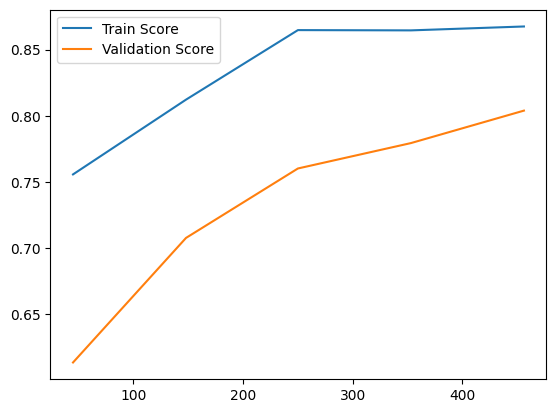

In [21]:
N, train_score, val_score = learning_curve(model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 5))
plt.plot(N, train_score.mean(axis=1), label='Train Score')
plt.plot(N, val_score.mean(axis=1), label='Validation Score')
plt.legend()